# Project 4 - Ice Game Data Analysis

## Introduction.

For this project we will be analysing open source video gaming data on behalf of "Ice" online video game store. The project will focus on the analysis of the provided dataset with the goal of identifying patterns across categories to plan a year 2017 campaign. 

Dataset description:

- Name (name of game)
- Platform (platform of game release)
- Year of release (year of game release)
- Genre (game genre)
- Na_Sales (North America sales in USD million)
- Eu_Sales (Sales in Europe USD in million)
- Jp_sales (Sales in Japan in USD million
- Other_sales (Sales in other countries in USD million)
- Critic_score (maximum of 100)
- User_score (maximun of 10)
- Rating (ESRB Rating)

Data for 2016 is specified to be potentially incomplete.

Some general questions this analysis aims to answer are: 

* Most sold game globally and by region.  
* Highest critic and user scores in relation to sales.
* Distribution patterns in relation to platforms / sales.
* Regional sales profiles: Top 5 platforms / genres.
* Statistical comparision between ratings and platforms / genres.

As the study progresses it is expected that more insights will be available to pursue for a more integrated study of the data and higher accuracy of campaign planification.

### Initialization

Import necessary libraries.

In [93]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np 
from math import factorial 
from scipy import stats as st

### Load Data

In [94]:
df = pd.read_csv('/datasets/games.csv')

### View data info and shape

Information on the dataset shows a total of 16715 rows and the 11 category columns as expected. With 6 columns as float type and 5 object type.

In [95]:
df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Most of the datasets structure appears to be in order with categorical and numerical columns in their correct datatypes. We must however correct the `user_score` column to float type if we wish to perform arithmetic operations with it. We will also be coverting the column names to all lower case for uniformity.

## Prepare Data

### Correct dataypes and columns names

The `user_score` column is encountered as an object type because it posseses a `tbd` (to be determinded) str value. We will be replacing this value with the column median of **5** in order to maintain `user_score` values stable for analysis. We then convert the column to float.

In [96]:
# Change column names to lower case
df = df.rename(str.lower, axis='columns')

# Correct user_score datatype
df['user_score'] = df['user_score'].replace('tbd', '5')
df['user_score'] = df['user_score'].astype('float')

### Handle missing values

Information on the dataset shows missing values present in 6 of the 11 columns some of categorical and others of numeric nature. There was no reason provided for these missing values, however, we can see most of the missing values pertaining to the critic / user score and rating columns. It may be that information was simply not available as an open source or perhaps rating and scores were dependent regional sales. 

We will be filling in most of these values in order to mainting the dataset uniform for analysis. Categorical missing values such `name`, `genre`, and `rating` will be filled with n/a (not available) to inform of missing data. Numerical value columns `critic_score`, `user_score` will be filled using the columns' mean values to not alter analysis.

In [97]:
# Fill missing values with n/a or mean.
df['name'] = df['name'].dropna()
df['genre'] = df['genre'].dropna()
df['year_of_release'] = df['year_of_release'].dropna()
df['rating'] = df['rating'].fillna('n/a')

### Add total sales column

We will add a `total_sales` column which adds all regional sales for each game in the dataset, for general sales comparision between categories.

In [98]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

### Final dataset

After preparing data the final version of our dataset shows the changes made with 12 columns and all missing values filled except for the `year_of_release` column as described.

In [99]:
df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,n/a,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,n/a,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,n/a,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,n/a,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,n/a,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,n/a,0.01


## EDA

### General visualization

With the goal of predicting a campaign model for 2017, we will start our data analysis by visualizing the number of games released each year. This in order to grasp a loose sense of relevent periods for analysis since our dataset encompases a broad 36 year period of data. We expect not all data to be relevant for a 2017 campaign.

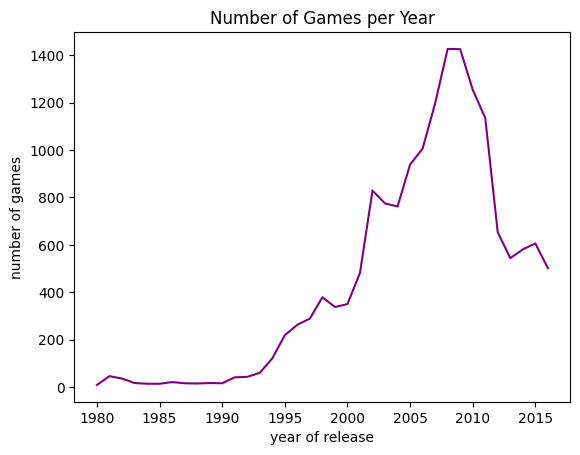

In [100]:
# Group and count games per year
games_years = df.groupby('year_of_release')['name'].count().reset_index()
games_years.columns = ['year_of_release', 'number_of_games']

# Plot bar chart
games_years.plot(kind='line', x='year_of_release', y='number_of_games',
                title='Number of Games per Year',
                xlabel="year of release",
                ylabel="number of games",
                legend=False,
                color='purple')
plt.show()

Our dataset shows periods from 1980 to 2015 avaialable. Data for 2016 appears to be incomplete as stated previously. First year periods show a low amount of sales registered which do exceed 200, with peak sales registered during the 2008 to 2011 periods. Afterwards we notice a decline in sales to the present 2016 period at apporximately 550 sales. 

From this chart we can suggest present day sales vary greatly from early period sales. The year 2000 appears to be the first instance of sales reaching present day sales. Further analysis is require to make significant modifications to the data for proper analysis.

### Platform analysis by sales and periods

We will now be reviewing the data for specific sales and periods to obtain more accurate relevant data in our analysis.
By grouping our data by **platform** and **years of release** we will now review how sales vary between platforms and period years. This should offer relevant data to make predictions.

We will first create a platform summary chart that groups data by `platform` and shows: the first year of recorded sales, the highest sales year recorded, and the last year of recorded sales, for each platform, as well as the total sales for each. The the dataset will be sorted by the `recent_sales_year` category to view relevant platform to  be analyzed.

In [101]:
# Group data by platform and show first sales, highest sales, recent year sales
platform_years = df.groupby('platform').agg({'year_of_release': ['min', lambda x: x[df.loc[x.index, 'total_sales'].idxmax()], 'max']}).reset_index()
platform_years.columns = ['platform', 'first_sales_year', 'highest_sales_year', 'recent_sales_year']

# Group data by platform display sum of total sales and merge with platform years
platform_sales = df.groupby('platform')['total_sales'].sum().reset_index()
platform_summary = pd.merge(platform_years, platform_sales, on='platform')

# Display dataframe
print("Platform summary data:")
platform_summary.sort_values(by='recent_sales_year', ascending=True)


Platform summary data:


,platform,first_sales_year,highest_sales_year,recent_sales_year,total_sales
0,2600,1980.0,1982.0,1989.0,96.98
9,GG,1992.0,1992.0,1992.0,0.04
22,SCD,1993.0,1993.0,1994.0,1.86
8,GEN,1990.0,1992.0,1994.0,30.77
11,NES,1983.0,1985.0,1994.0,251.05
1,3DO,1994.0,1995.0,1995.0,0.10
24,TG16,1995.0,1995.0,1995.0,0.16
12,NG,1993.0,1994.0,1996.0,1.44
14,PCFX,1996.0,1996.0,1996.0,0.03
23,SNES,1990.0,1990.0,1999.0,200.04


Our platform summary data shows platform sales do not follow a concrete pattern of sales thorughout the dataset. Several of the high selling platforms are present in the earlier periods. We can infer that even though a platform has the majority of sales it may not be relevant to our data as it no longer generates sales. If a platform is not longer generating sales we can infer a newer version was released or the platform simply stopped production.

To choose relevant period years we will calculate the average lifespan of a platform to ensure sales are still being generated and serve for a 2017 sales campaign.

In [102]:
# Initialize function
def lifespan(input_df):
    
    # Calculate lifespan
    for platform in input_df['platform']:
        input_df['years_active'] = input_df['recent_sales_year'] - input_df['first_sales_year']
            
    return input_df

# Apply func.
lifespan(platform_summary)

# Result
average_life = platform_summary['years_active'].mean()
print(f"Average platform lifespan = {average_life:.2f}")

Average platform lifespan = 7.61


Our function return a result of 7 average years in which a platform maintains active sales, afterwards its sales stop. This period of years serves to important insights.

1. Serves as a reference of how back in years we can take or data to be relevant.
2. Serves to suggest which consoles can take priority based portential future longevity and sales.

### Relevant data

Using this number we will plot two charts which filter data based on the described criteria: Average platform lifespan and top sales. Filtered data will look at data within the preceeding **7 years** and take into account platorm with sales greater than **100 million USD.**

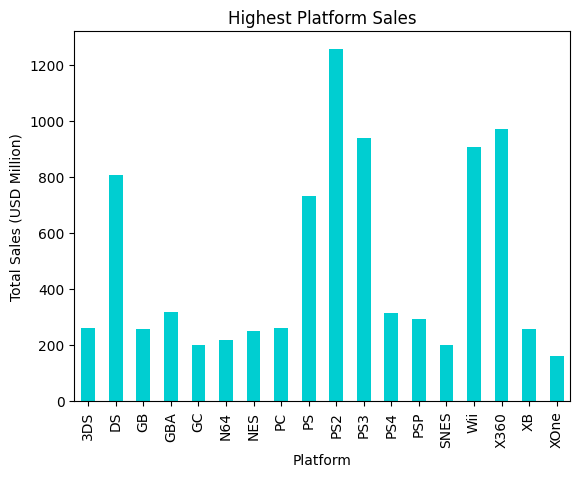

In [103]:
# Filter data with sales greater than 100 and year greater than 2010
platform_highest_sales = platform_summary[platform_summary['total_sales'] > 100]
platform_recent_years = platform_summary[platform_summary['recent_sales_year'] > 2013]

# Plot highest sales
platform_highest_sales.plot(kind='bar', x='platform', y='total_sales',
                           title="Highest Platform Sales",
                           xlabel="Platform",
                           ylabel='Total Sales (USD Million)',
                           legend=False,
                           color='darkturquoise')
plt.show()

The first chart concerning highest sales shows platforms such as the PS2, X360, and PS3 possessing highest sales. However we must now look at our chart concerning the relevant period data to see how it differs.

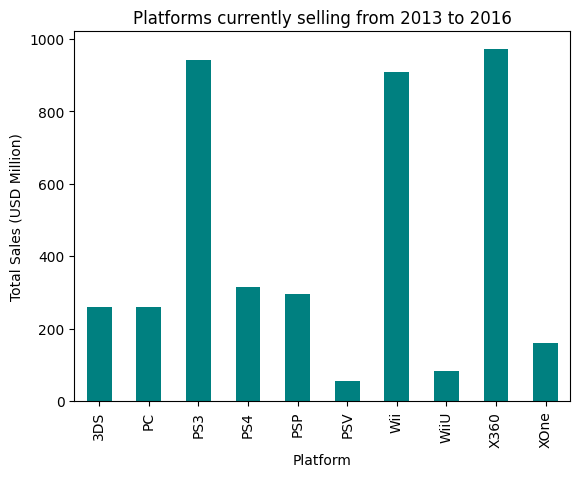

In [137]:
# Plot relevant years (Average platform life)
platform_recent_years.plot(kind='bar', x='platform', y='total_sales',
                          title="Platforms currently selling from 2013 to 2016",
                          xlabel="Platform",
                          ylabel="Total Sales (USD Million)",
                          legend=False,
                          color='teal')
plt.show()

As expected many platforms are droped in this chart as they do not meet the required criteria of generating sales and can be disregarded. Even though the platforms in our latest chart meet the relevant platform lifespan we must further revise several of their sales throughout periods and acquire those with the highest life expectacy as we are concerned with modeling a future sales campagin. 

We can hypothesize to see platforms which posses high sales at the start of the 7 year period to be at very low sales by of the lifespan if already reached or about to reach it.

We will select several consoles that should be representative of our hypothesis.

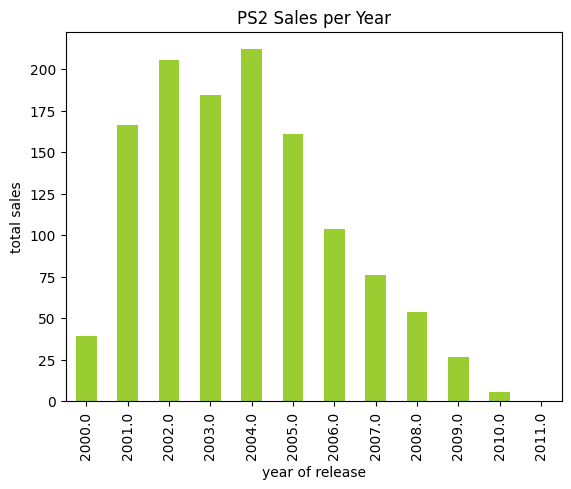

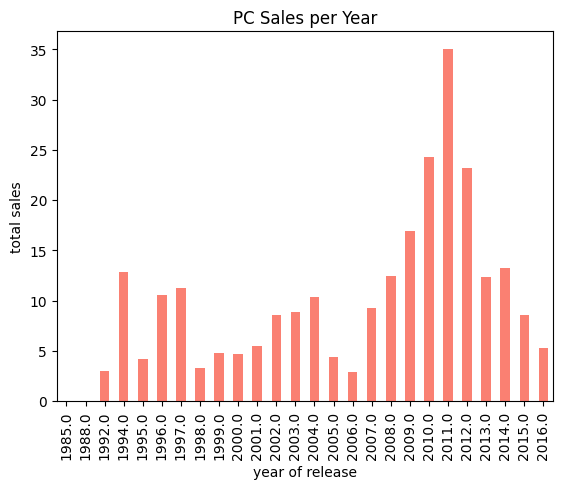

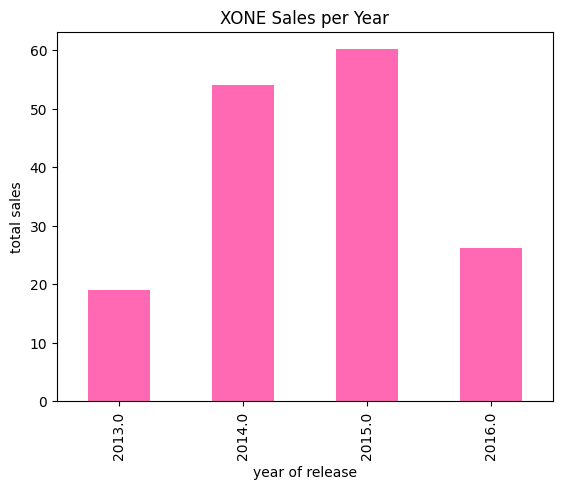

In [105]:
# Group data by platform and year of release to show total sales
platform_years_sales = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Filter platforms
PS2_sales = platform_years_sales[platform_years_sales['platform'] == 'PS2']
XOne_sales = platform_years_sales[platform_years_sales['platform'] == 'XOne']
PC_sales = platform_years_sales[platform_years_sales['platform'] == 'PC']

# Plot charts
PS2_sales.plot(kind='bar', x='year_of_release', y='total_sales',
              title="PS2 Sales per Year",
              xlabel="year of release",
              ylabel="total sales",
              legend=False,
              color='yellowgreen')

PC_sales.plot(kind='bar', x='year_of_release', y='total_sales',
               title="PC Sales per Year",
               xlabel="year of release",
               ylabel="total sales",
               legend=False,
               color='salmon')

XOne_sales.plot(kind='bar', x='year_of_release', y='total_sales',
               title="XONE Sales per Year",
               xlabel="year of release",
               ylabel="total sales",
               legend=False,
               color='hotpink')


plt.show()


Three consoles were selected in order to test of our platform lifespan hypothesis: PS2, PC and WiiU.

- PS2: Chart shows the platform had a lifspan of 12 years. Although the platform has the higest sales the chart shows its sales to stop in the year 2011. This is our first confirmed insight into proper filtering of our dataset for a 2017 model.


- PC: Chart demostrates a platform life of 31 years. Although this platform has passed the average lifespan chart shows current day sales at 5. This is another key insight into our relevant data as it shows a platform's first year of opertation to not always conform to out avergage platform lifespan.


- XONE: Chart shows platform lifespan of 4 years with last sales in 2016 at above 20. In this case, based on our average lifespan expectacy we can assume the platform has at least 3 more years before it stops generating sales.

### Filtering based on relevant data

We will now filter our dataset to include data we have come to consider relevant to model a 2017 sales campaign and disregard data for games in platforms which no longer generate sales. Thus we filter the data set to only include platforms that have generated sales in 2016.

In [140]:
# Filter dataset using relevant platform list
df_main = df[df['year_of_release'] >= 2013]
df_main

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,n/a,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,n/a,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,n/a,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,n/a,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,n/a,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,n/a,0.01


Our result is a dataset with 6623 rows. As stated our main concern gathered through insights, are games present in platforms generating current day sales. A game released prior to 2016 will still be relevant as long as its platform version is currently being sold, in other words, findings suggest game sales to be very reliant on platform lifespan.

This new dataset should help plan a better 2017 as it offers current reliable data. Based on out insights we may yet prioritize high selling game candidates based on most recent sales and how much lifespan a platform still has in the following years.

### Gobal Sales

With our curent data we will now review global game sales by platform for insights to use in the future campagin. We will focus on sales differences between platforms to find the most profitable. 

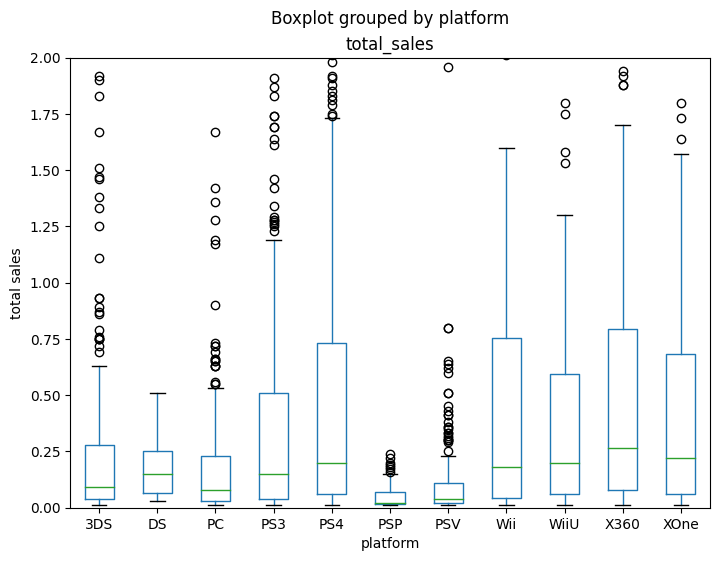

In [144]:
# Plot chart
df_main.boxplot(column='total_sales',
                  by='platform',
                  grid=False, 
                  figsize=(8,6))

plt.ylim(0,2)
plt.ylabel("total sales")
plt.show()

Our sales visualization present several observations:

The boxplot shows that overall highest game sales pertain to platforms PS3, PS4, Wii, X360 and XOne. With medians for all platforms staying close to cero, however, boxplots shows averages for platform sales averages is quite diverse, with individual titles frequently driving highest total sales for each platform as outliers.

To get a broader view of sales distribution we look at the average of total sales of games per platform.

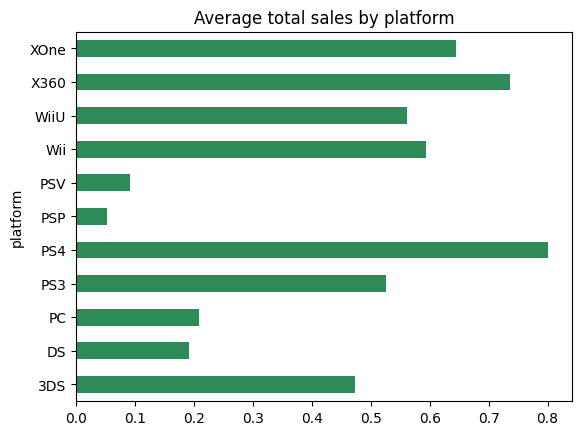

In [146]:
# Filter, aggregate function and display
df_main.pivot_table(index='platform', values='total_sales', aggfunc='mean').plot(kind='barh', 
                    title='Average total sales by platform', ylabel='mean', legend=False, color='seagreen')
plt.show()

The Average sales plot confirms our most profitable platforms observations with the mentioned platforms appearing as the highest avergae sellers as well. Note that Wii is also included as a highest seller in this chart as its outlier game Wii Sports is also present in the data. 

### Critic and User Scores

Another important factor to analyze is critic and user scores in relation to sales, we must look at thier distribution to see if there is in fact correlation between them. Instead of reviewing all platform total sales per critic/user score, we will focus on a top selling platform (XOne) to give us a general understanding. 

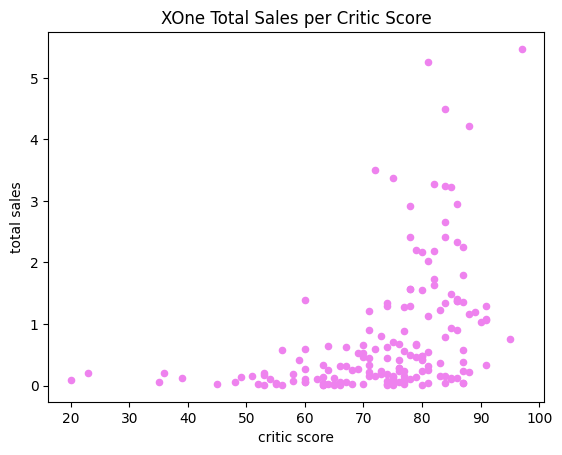

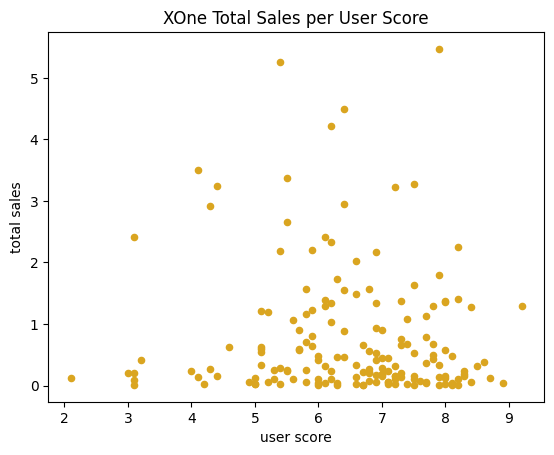

In [147]:
# Filter data and group data
df_XOne = df_main[df_main['platform'] == 'XOne']
XOne_scores_sales = df_XOne.groupby(['name', 'critic_score', 'user_score'])['total_sales'].sum().reset_index()

# PLot total sales per critic scores 
XOne_scores_sales.plot(kind='scatter', x='critic_score', y='total_sales',
                      title='XOne Total Sales per Critic Score',
                      xlabel="critic score",
                      ylabel='total sales',
                      color='violet')

plt.show()

# PLot total sales per user scores 
XOne_scores_sales.plot(kind='scatter', x='user_score', y='total_sales',
                      title='XOne Total Sales per User Score',
                      xlabel="user score",
                      ylabel='total sales',
                      color='goldenrod')

plt.show()

The critic score rating achieves a maximum of 100. Through our scatter plots we can observe XOne games critic scores to receieve mostly ratings of 60 to 90 with the highest selling games to have scores of 70 to 100. 

The user score displays a maximum of 10. The plot shows most XOne games receving scores from 6 to 9 however, plot show high sales recorded in a broader spectrum of scores. Many games are shown to have high sales with scores ranging from 4 to 9.

To be more precise about our assumption with scores we calculate said correlation coefficient using `numpy` `corr`.

In [148]:
# Apply function to filtered dataframs
corr_critic_score =  XOne_scores_sales['critic_score'].corr(XOne_scores_sales['total_sales'])
corr_user_score = XOne_scores_sales['user_score'].corr(XOne_scores_sales['total_sales'])

# Dispplay results
print('Correlation between critic scores and total sales is', corr_critic_score)
print()
print('Correlation between user scores and total sales is', corr_user_score)

Correlation between critic scores and total sales is 0.4153923422848882

Correlation between user scores and total sales is -0.07815069213297711


Correlation numnbers of scores / total sales suggest that:

- There is a positive correlation of 0.37 between total sales and critic scores. This confirms our plot observation in which sales do tend increas as critics rate games higher in the scale.


- There is a negative correlation of -0.027 between total sales and user scores. This seem to indicate much less correlation between scores and sales when it comes to gaming user input.

### Mutiplatform Game Sales

As we can see by our data individual game sales some times surpass average game sales in a particular platform by a considerable number. It would be wise to observe how sales of certain games available across multiple platforms differ form each other. This may provide insights into high selling games for a particualr platform.

In [149]:
# Group data for non unique games accorss platforms
game_platform = df_main.groupby('name')['platform'].nunique().reset_index()

# Filter for games avaiable across at least 6 platforms
common_games = game_platform[game_platform.platform >= 6]
common_games

,name,platform
27,Adventure Time: Finn & Jake Investigations,6
48,Angry Birds Star Wars,8
66,Assassin's Creed IV: Black Flag,6
140,Call of Duty: Ghosts,6
246,Disney Infinity,6
247,Disney Infinity 2.0: Marvel Super Heroes,6
333,FIFA 14,9
334,FIFA 15,8
522,Just Dance 2014,6
523,Just Dance 2015,6


Our returned dataframe shows 36 titles to be multiplatform games. We will focus on viewing sales across platforms for several selected games to view how they differ.

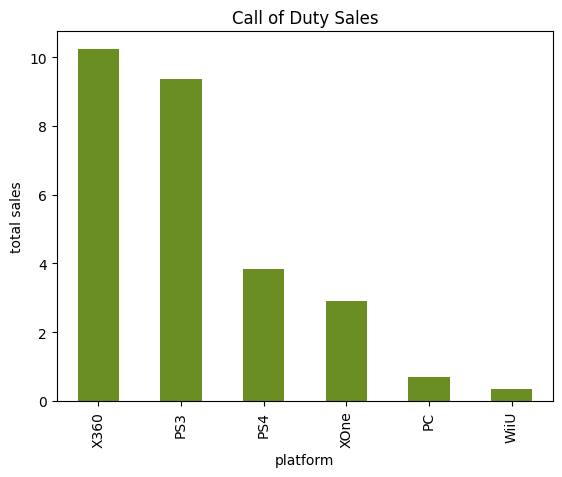

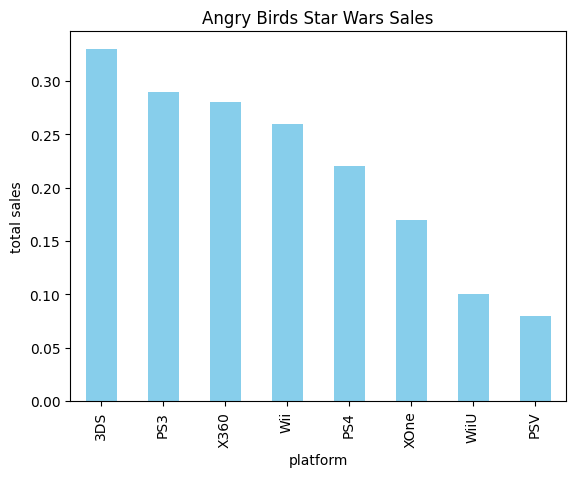

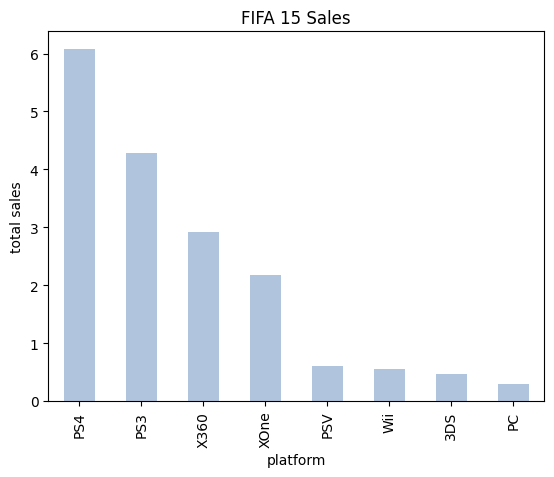

In [150]:
# Filter for selected games
cod = df_main[df_main['name'] == 'Call of Duty: Ghosts']
ab= df_main[df_main['name'] == 'Angry Birds Star Wars']
fifa_15 = df_main[df_main['name'] == 'FIFA 15']

# Plot games comparison charts
cod.plot(kind='bar', x='platform', y='total_sales',
        title="Call of Duty Sales",
        xlabel="platform",
        ylabel='total sales',
        legend=False,
        color='olivedrab')

plt.show()

ab.plot(kind='bar', x='platform', y='total_sales',
        title="Angry Birds Star Wars Sales",
        xlabel="platform",
        ylabel='total sales',
        legend=False,
        color='skyblue')

plt.show()

fifa_15.plot(kind='bar', x='platform', y='total_sales',
        title="FIFA 15 Sales",
        xlabel="platform",
        ylabel='total sales',
        legend=False,
        color='lightsteelblue')

plt.show()

Our charts confirm variation between platofrm sales ocurrs for each game, with sales in one platform out perfomring sales in another for the same game. We can also see several consistent high selling platform versions such as PS3 titles PS4 and X360 titles.

### Genre Distribution 

The genre category in our data set also serve as reference point for sales insights. We will review what genres generate most sales and how many titles are available for each genre.

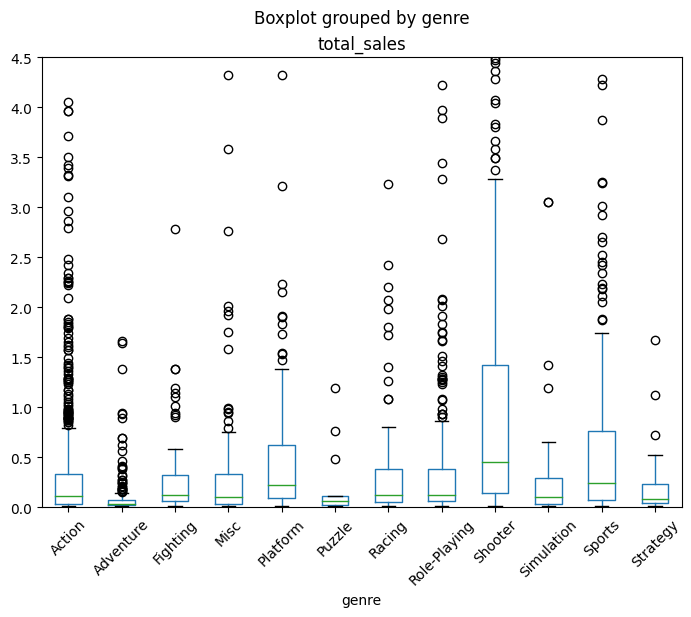

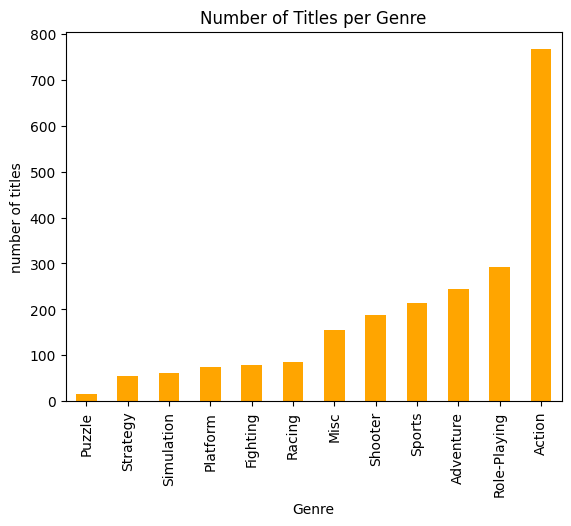

In [179]:
# Group data by genre sort data by total sales
df_genre_sales = df_main.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=True)

# Group and sort data for title count of each genre
df_genre_name = df_main.groupby('genre')['name'].count().reset_index().sort_values(by='name', ascending=True)

# Plot sales per genre
df_main.boxplot(column='total_sales',
                  by='genre',
                  grid=False, 
                  figsize=(8,6))

plt.xticks(rotation=45)
plt.ylim(0,4.5)
plt.show()

# Plot games per genre
df_genre_name.plot(kind='bar', x='genre', y='name',
        title="Number of Titles per Genre",
        xlabel="Genre",
        ylabel='number of titles',
        legend=False,
        color='orange')

plt.show()


Our genre sales visualizations shows the top three selling genres to be ***Action***, ***Shooter*** and ***Sports***. This data offers potential genre marketing focal points for the preceding campagin and can be considerd key to build a high selling profile criteria for titles. This chart shows upper quartiles of highest selling genres not being entirely representative of total sales in genre, much like global sales, entire genre sales are mostly driven by individual titles.

Our data also shows that genres with most sales are also genres with most entries, this confirms thier overall sales popularity.

## Regional Profiling

Until now we have been exploring data with a focus on global sales, we will now focus on regional insights for the 2017 campaign. The data set offers regional sales data from ***Japan***, ***North America*** and ***Europe***. Game sales not registered to any of the defined regions are listed as ***other sales***.  

Focal point of insights by reigon will focus on: Top performing platforms, top game genres, how ESRB rating affect regional sales.

We will begin by filtering for data we are intereseted in.

### North America

In [152]:
# Filter for platform, genre and ESRB rating sales in North America
na_platforms = df_main.groupby('platform')['na_sales'].sum().reset_index()
na_genre = df_main.groupby('genre')['na_sales'].sum().reset_index()
na_ESRB = df_main.groupby('rating')['na_sales'].sum().reset_index()

#### Top Platform Sales

Our focus will be on finding the ***top five*** selling platforms of each region, beginning with North America.

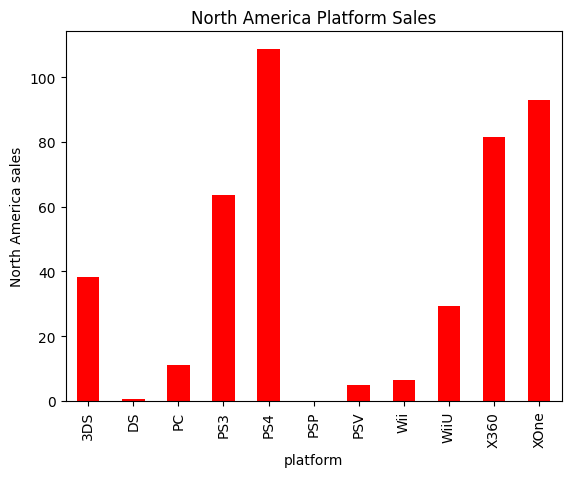

In [153]:
# Plot North America Sales
na_platforms.plot(kind='bar', x='platform', y='na_sales',
                  title="North America Platform Sales",
                  xlabel="platform",
                  ylabel='North America sales',
                  legend=False,
                  color='red')
plt.show()

The chart shows the five highest selling platforms in NA are:

1. PS4 with sales above 100 mil
2. XOne with sales slightly below 100 mil
3. X360 with sales above 800 mil
4. PS3 with sales above 60 mil
5. 3DS with sales slightly below 40 100 mil.

Now we will take a look at the regional market shares that each platform has had on North America.

####  North American Shares

The data will be displayed over time to track low and high share holding periods

/tmp/ipykernel_32/817386243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['na_share'] = df_main['na_sales'] / df_main['total_sales'] * 100
/tmp/ipykernel_32/817386243.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


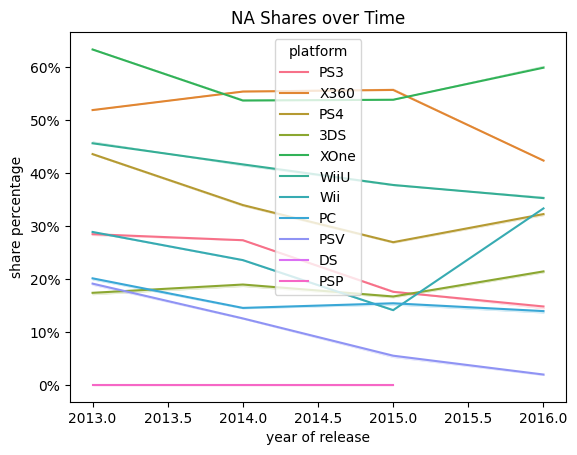

In [154]:
# Add North American Shares column to data
df_main['na_share'] = df_main['na_sales'] / df_main['total_sales'] * 100

# Plot platform shares over time
sns.lineplot(data=df_main, x='year_of_release', y='na_share',
             hue='platform',
             ci=False)

plt.title("NA Shares over Time")
plt.xlabel("year of release")
plt.ylabel("share percentage")
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
plt.show()

As shown the X360 has maintained over 50 percent of sales over 8 competitors over its lifespan. The current highest share holder currently begin the XOne. Platforms like the Wii and PS3 are shown to have decreased gradually in their share percentage in the last three years.

#### Top Genre Sales

Review of top five genres in North America

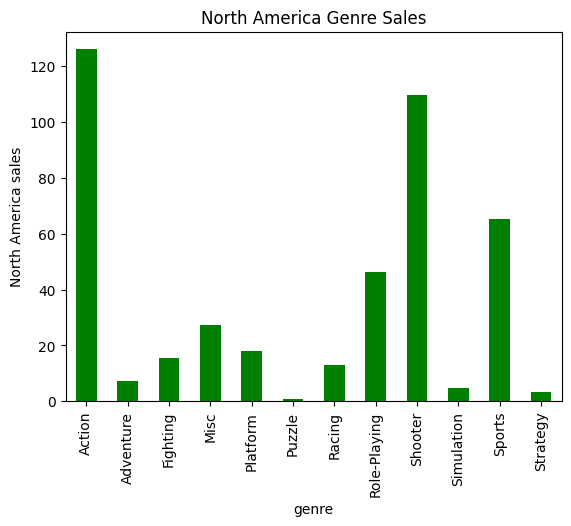

In [155]:
# Plot genre sales in North America
na_genre.plot(kind='bar', x='genre', y='na_sales',
                  title="North America Genre Sales",
                  xlabel="genre",
                  ylabel='North America sales',
                  legend=False,
                  color='green')
plt.show()

The graph shows top genres in NA to be:

1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc

Sales for the action genre at 120 mil are well above the rest with the shooter genre second place with below 120 mil in sales. 

#### ESRB Ratings

Review of ESRB game rating on sales in NA.

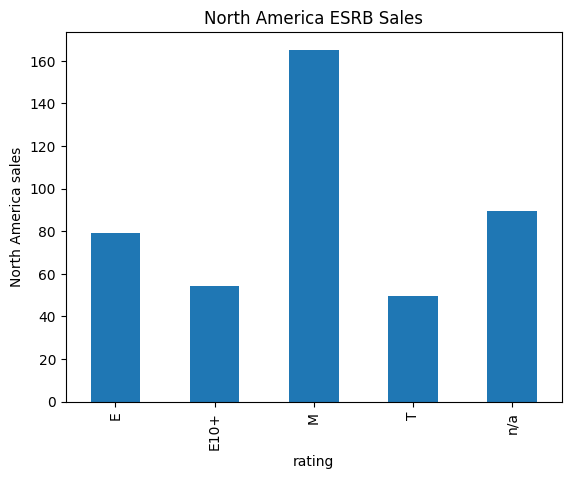

In [156]:
# Plot NA ESRB rating sales
na_ESRB.plot(kind='bar', x='rating', y='na_sales',
                  title="North America ESRB Sales",
                  xlabel="rating",
                  ylabel='North America sales',
                  legend=False)
plt.show()

The chart shows that games in the "Mature" and "Everybody" rating categories posses the most sales, with "mature" surpassing the 160 mil mark. This might be an insight for regional buyer / player age, or may be tied to the amount of games released in said rating categories.

### Japan

In [157]:
# Filter for platform, genre and ESRB rating sales in Japan
jp_platforms = df_main.groupby('platform')['jp_sales'].sum().reset_index()
jp_genre = df_main.groupby('genre')['jp_sales'].sum().reset_index()
jp_ESRB = df_main.groupby('rating')['jp_sales'].sum().reset_index()

#### Top Platform Sales

Review of top five selling platform in Japan

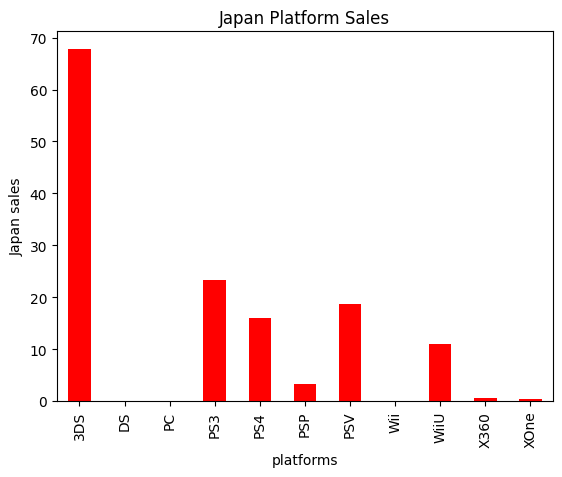

In [158]:
# Plot Japan Sales
jp_platforms.plot(kind='bar', x='platform', y='jp_sales',
                  title="Japan Platform Sales",
                  xlabel="platforms",
                  ylabel='Japan sales',
                  legend=False,
                  color='red')
plt.show()

The chart shows the five highest selling platforms in Japan are:

1. 3DS with sales at 70 mil
2. PS3 with sales at above 20 mil
3. PSV with sales at 20 mil
4. PS4 with sales at below 20 mil
5. WiiU with sales at slightly slightly above 10 mil

Now we will take a look at the regional market shares that each platform has had on Japan over time.

#### Japan Sales Shares

Display Japan shares over time.

/tmp/ipykernel_32/519015141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['jp_share'] = df_main['jp_sales'] / df_main['total_sales'] * 100
/tmp/ipykernel_32/519015141.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


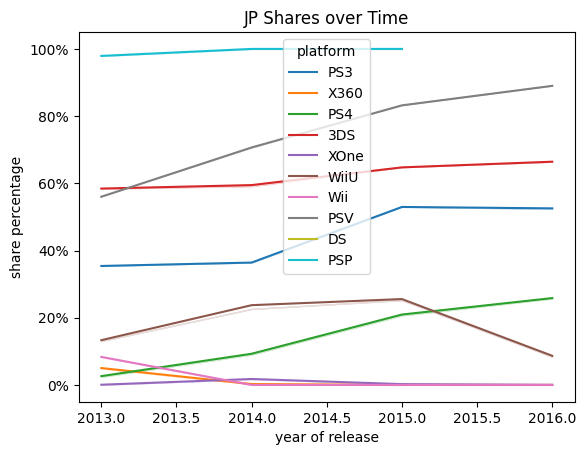

In [159]:
# Add Japan Shares column to data
df_main['jp_share'] = df_main['jp_sales'] / df_main['total_sales'] * 100

# Drop PC from Japan shares plot
df_drop_PC = df_main[df_main['platform'] != 'PC']

# Plot platform shares over time
sns.lineplot(data=df_drop_PC, x='year_of_release', y='jp_share',
             hue='platform',
             ci=False)

plt.title("JP Shares over Time")
plt.xlabel("year of release")
plt.ylabel("share percentage")
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
plt.show()

Chart shows an the PSP to possess nearly 100 percent of shares over its current lifespan.  The PSV shows the highest increase in shares over the last 3 years with the 3DS maintaining 60 percent of shares in the current data year of 2016.

#### Top Genre Sales

Review of top five genres in Japan.

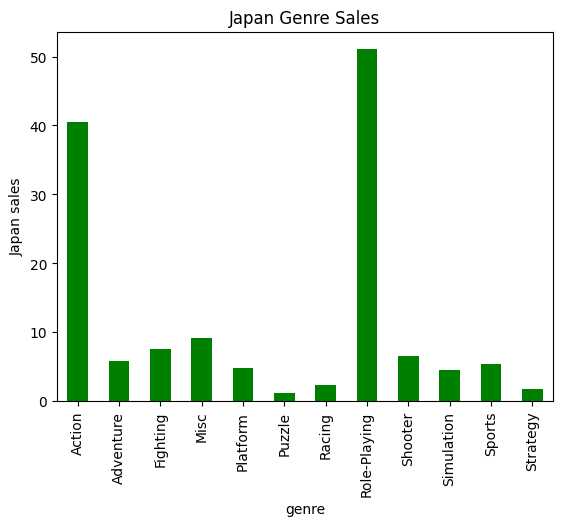

In [160]:
# Plot genre sales in Japan
jp_genre.plot(kind='bar', x='genre', y='jp_sales',
                  title="Japan Genre Sales",
                  xlabel="genre",
                  ylabel='Japan sales',
                  legend=False,
                  color='green')
plt.show()

The graph shows top genres in Japan to be:

1. Role-Playing
2. Action
3. Misc
4. Fighting
5. Adventure

Genre sales in Japan show "role-playing" in first place at 50 while the second place "action" at above 40. This differs greatly from North Americas first place genre however as we can see the "action" genre is also places as one of the most popular genres in Japan.

#### ESRB Ratings

Review of ESRB game rating on sales in Japan.

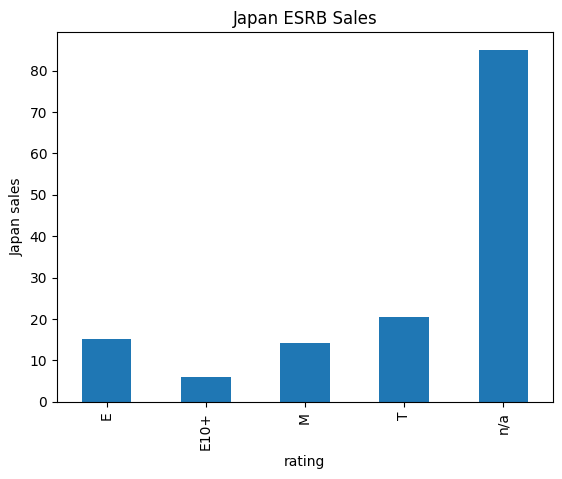

In [161]:
# Plot Japan ESRB rating sales
jp_ESRB.plot(kind='bar', x='rating', y='jp_sales',
                  title="Japan ESRB Sales",
                  xlabel="rating",
                  ylabel='Japan sales',
                  legend=False)
plt.show()

Japan ESRB ratings in relation to sales present an odd event were missing data appears to have highest sales. Possiblities for this may include the data simply missing or most games in Japan do not recieve the global ESRB ratings. The highest rating in sales following appers to be the "teen" rating.

### Europe

In [162]:
# Filter for platform, genre and ESRB rating sales in Europe
eu_platform = df_main.groupby('platform')['eu_sales'].sum().reset_index()
eu_genre = df_main.groupby('genre')['eu_sales'].sum().reset_index()
eu_ESRB = df_main.groupby('rating')['eu_sales'].sum().reset_index()

#### Top Platform Sales

Review of top five platforms in Europe.

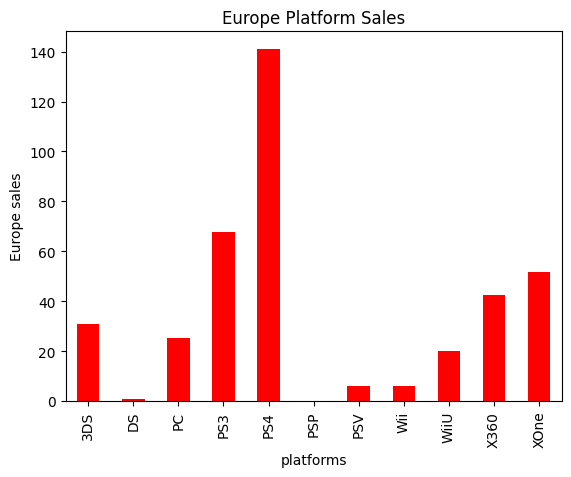

In [163]:
# Plot Japan Sales
eu_platform.plot(kind='bar', x='platform', y='eu_sales',
                  title="Europe Platform Sales",
                  xlabel="platforms",
                  ylabel='Europe sales',
                  legend=False,
                  color='red')
plt.show()

The chart shows the five highest selling platforms in Europe are:

1. PS4 with sales at 140 mil
2. PS3 with sales above 60 mil
3. XOne with sales alightly below 60 mil
4. X360 with sales above 40 mil
5. 3DS with sales at slightly below 40 

European sales place the PS4 at sales above 140 with the PS3 and XOne in second at around 60 mil. Here we can see a similarity between North American and European sales with Japan differing in sales trend.

#### Europe Sales Shares

Display data over time.

/tmp/ipykernel_32/302974428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['eu_share'] = df_main['eu_sales'] / df_main['total_sales'] * 100
/tmp/ipykernel_32/302974428.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


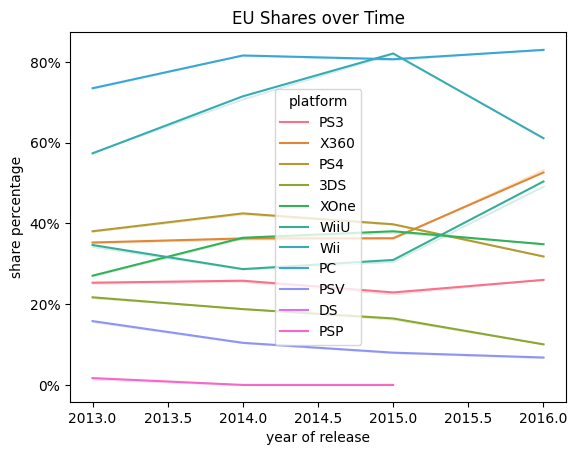

In [164]:
# Add Europe Shares column to data
df_main['eu_share'] = df_main['eu_sales'] / df_main['total_sales'] * 100

# Plot platform shares over time
sns.lineplot(data=df_main, x='year_of_release', y='eu_share',
             hue='platform',
             ci=False)

plt.title("EU Shares over Time")
plt.xlabel("year of release")
plt.ylabel("share percentage")
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
plt.show()

Shares chart shows an increase in Wii share over the datas last three years, reaching around eighty percent of shares around 2015. Other platforms of note include the X360 increasing its shares slightly below sixty percent in lastest year. European shares once again demonstate the X360, PS4 and Wii to posses a significant amount of total sales shares for the region over timespan. 

#### Top Genre Sales

Review of top five genres in Eurpoe.

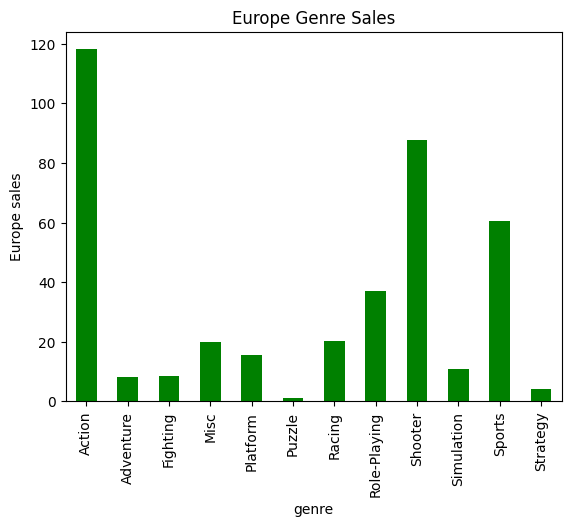

In [165]:
# Plot genre sales in Europe
eu_genre.plot(kind='bar', x='genre', y='eu_sales',
                  title="Europe Genre Sales",
                  xlabel="genre",
                  ylabel='Europe sales',
                  legend=False,
                  color='green')
plt.show()

The graph shows top genres in Europe to be:

1. Action
2. Shooter
3. Sports
4. Role=Playing
5. Racing

Genre sales in Eurpoe show "action" genre placing first at above 300 sales while "shooter" and "sports" placing second and third respectively. Chart shows first three platform placements to conform in trend with North America while the genre "misc" is consistent accors all regions placing fourth.

#### ESRB Ratings

Review of ESRB game rating on sales in Eurpoe.

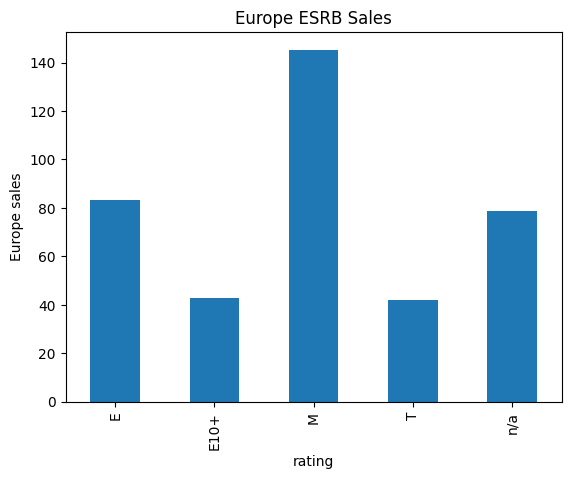

In [166]:
# Plot Japan ESRB rating sales
eu_ESRB.plot(kind='bar', x='rating', y='eu_sales',
                  title="Europe ESRB Sales",
                  xlabel="rating",
                  ylabel='Europe sales',
                  legend=False)
plt.show()

Much like North America both the "mature" and "everybody" ratings are the highest sellers both at above 350 with "teen" placing third. These trends in ESRB ratings appear consistent with platform and genre ratings accross both NA and Europe.

### Other Sales

For other undefined regional sales we will not take into account ESRB ratings we have no way of knowing how the ratings affect the sales in the regions they were made.

In [167]:
# Filter for platform and genre sales in undefined regions
other_platform = df_main.groupby('platform')['other_sales'].sum().reset_index()
other_genre = df_main.groupby('genre')['other_sales'].sum().reset_index()

#### Top Platform Sales

Top platform sales in undefined regions.

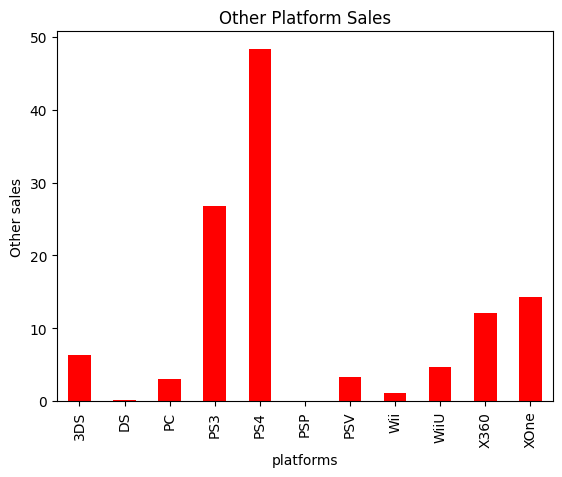

In [168]:
# Plot Japan Sales
other_platform.plot(kind='bar', x='platform', y='other_sales',
                  title="Other Platform Sales",
                  xlabel="platforms",
                  ylabel='Other sales',
                  legend=False,
                  color='red')
plt.show()

The chart shows the five highest selling platforms in other regions are:

1. PS4 with sales below 50
2. PS3 with sales below 30
3. XOne with sales slightly below 20
4. X360 with sales above 10
5. 3DS with sales below 10 

Chart shows a great number of sales generating from unidentified reasons. However highest selling platforms games appear to be those selling highest in both NA and Europe, this might be an insight as to where these sales come from, though we cannot say for sure with this data. 

#### Undefined Sales Shares

Display data over time.

/tmp/ipykernel_32/1783935502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['other_share'] = df_main['other_sales'] / df_main['total_sales'] * 100
/tmp/ipykernel_32/1783935502.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


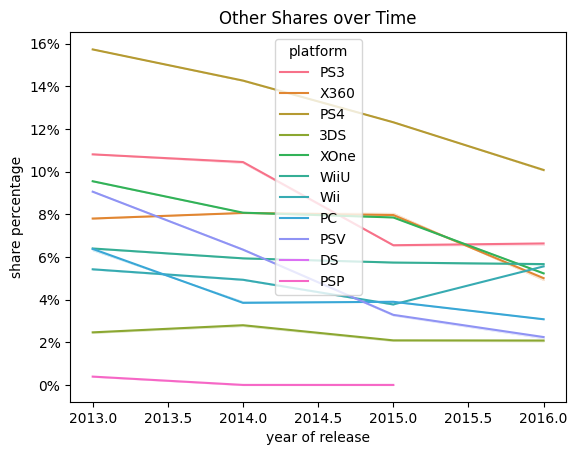

In [169]:
# Add undefined Shares column to data
df_main['other_share'] = df_main['other_sales'] / df_main['total_sales'] * 100

# Plot platform shares over time
sns.lineplot(data=df_main, x='year_of_release', y='other_share',
             hue='platform',
             ci=False)

plt.title("Other Shares over Time")
plt.xlabel("year of release")
plt.ylabel("share percentage")
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
plt.show()

Undefined platform market shares seem to follow global trends according to chart. With X360 and PS3 possessing share majority over time.

#### Top Genre Sales

Review top genre sales in other regions.

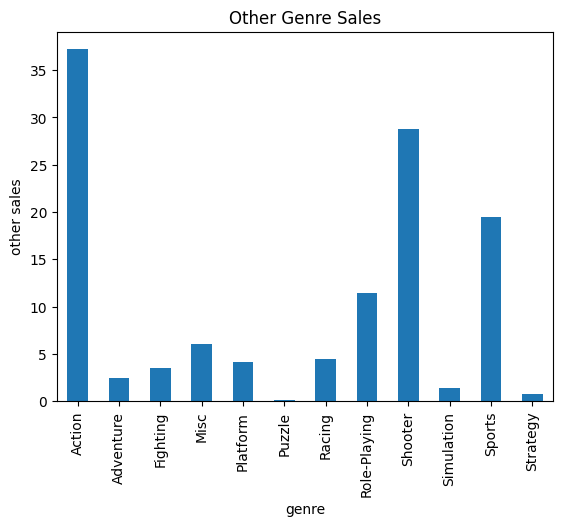

In [170]:
# Plot genre sales in undefined
other_genre.plot(kind='bar', x='genre', y='other_sales',
                  title="Other Genre Sales",
                  xlabel="genre",
                  ylabel='other sales',
                  legend=False)
plt.show()

Once again chart shows North American and European sales similaties for genre categories "action", "shooter", "Sports".

### Regional Assessments

For our ploted data we find helpful insights for top selling platforms, genres and ESRB ratings across regions such as:

* Both North America and Europe's highest selling platforms are X360, PS3 and Wii
* The 3DS is Japan highest seller.
* High market shares in a three regions belong to the same platforms accross all regions.
* High selling genres appear the sames accross all regions: Action, Shooter, Sports. With Japan placing Role-Playing highest.
* Both Europe and North America tend to gravitate towards "M" and "E" ESRB ratings.

## Statistical Analysis

We will now focus on answering several questions regarding statistical cross-comparison of data. This will help draw more precise trends across categories for further modeling a 2017 campaign.

We are interested in knowing if average user scores for the XOne and PC platforms are the same, and, if average user scores are different for the "action" and "sports" genres.

Our current data shows missing values in the user score category, if we are to obatin an overall average to compare we must first drop these values.

In [211]:
# Filter for XOne and PC user score average
df_XOne = df_main[df_main['platform'] == "XOne"]
df_PC = df_main[df_main['platform'] == "PC"]

# Drop missing user score rows
df_XOne = df_XOne.dropna(subset=['user_score'])
df_PC = df_PC.dropna(subset=['user_score'])

To answer the first question we will test for `user_score` mean equality where:

- null hypothesis: XOne user score == PC user score
- alternative hypothesis: XOne user score != PC user score

We will condcut a t-test of out sample means setting an ***alpha*** of **0.05**, where the p-value of getting the same average user score on both platforms must be less than alpha in order to reject the null hypothesis.

In [212]:
# Perform t-test on user scores
platform_scores_test = st.ttest_ind(df_XOne['user_score'], df_PC['user_score'])

# Set alpha value
alpha = 0.05

print("p-value:", platform_scores_test.pvalue)

print()

if platform_scores_test.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis") 

p-value: 0.2178845507684032

We cannot reject the null hypothesis


Our result shows a p-value that is less than 0.00, alpha beign 0.05, therefore we **cannot reject** the null hypothesis and conclude that average user scores of XOne and PC are the **same**.

Now we are to test if average user scores are different for the Actions and Sports genres.

In [213]:
# Filter for action and sports genres
df_action = df_main[df_main['genre'] == 'Action']
df_sports = df_main[df_main['genre'] == 'Sports']

This t-test will also have an ***alpha*** set to 0.05 and follow the previous test structrue where:

- null hypothesis: Action user score == Sports user score
- alternative hypothesis: XOne user score != PC user score

In [214]:
# Perform t-test on user scores
platform_genre_test = st.ttest_ind(df_action['user_score'], df_sports['user_score'])

# Set alpha value
alpha = 0.05

print("p-value:", platform_scores_test.pvalue)

print()

if platform_scores_test.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis") 

p-value: 0.2178845507684032

We cannot reject the null hypothesis


Results similarly show a p-value of less than 0.00, thus we reject the null hypothesis, which signifies we do in fact believe the average user scores between the action and sports genres are **not different.**

## Conculsions: Modeling a 2017 Sales Campaign

Now with our aquired data we have substantial insights to formulate a profitable 2017 Ice Games sales campaign based on sales profiles, regional data, periods, genres and scores.

A 2017 campaign should focus on and prioritize the following:

* Titles for potential highest selling platforms in 2017. These platforms posses at least three to four years of thier lifespan (7 years) remaining. As period and shares data indicate, platforms game sales usually reach their highest selling point 2 to 3 years after platform launch. Platforms that meet these criteria are: **XOne, PS4** and **WiiU**


* Titles for average highest selling platforms such as **X360, Wii, PS3** whose market shares indicate current high sales despite have passsed or are in thier lifespans final years.


* Multiplatform titles can **differ substantially** in sales depending on thier different platform versions, this must be taken into account on an individual title basis. 


* Top 2 genres remain globally consistent as **"action" and "shooter.** This data may be paired with individual title sales data to obtain most profitable titles.


* As seen by critic and user score comparison: **critic score** appears to be a more **reliable** measure upon which to gauge potential high sellers.


* Both North America and Europe should prioritize titles for the **PS4, X360** and **XOne** platforms that fall under the **action, shooter** and **sports** genres.


* Japan should prioritize titles for the **3DS, PS3** and **PSV** titles that fall under **role-playing, action** and **sports** genres.


* Statistical tests are a valid form of category cross-comparison sales into **consumer habits.** In this case, comparing averages between genres or platforms for example, may give insight into category preferences based on another.

While this study comprised a relatively small sample size due to data filtration, the provided insights comprise a well suited understanding of the general title sales provided by Ice. These general insights can be used to further expand study into a more precise understanding of the sales data. For the purposes of this study, a 2017 sales campaign based on this analysis, should provide healthy results.